# Author : Basa Sai Ram

## Exploratory Data Analysis on amcat 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Read CSV using Pandas

In [209]:
df=pd.read_csv("E:\\innomatics\\Kanav\\aspiring_minds.csv")

In [210]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Shape

In [211]:
df.shape

(3998, 39)

####  Data

In [212]:
df.select_dtypes(include="object").columns

Index(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10board', '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

#### Categorical Data

In [213]:
df.select_dtypes(include="number").columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Creating Variables for Analysis

In [214]:
# As there is no total amcat ability score in dataset here creating amcat total Score
df["AbilityScore"]=df['English']+df['Logical']+df['Quant']

In [215]:
# To find the Education gap to complete Graduation
df["Educationgap"]=df["GraduationYear"]-df["12graduation"]

In [216]:
# Getting the Date of Joining "year" from Dataset using 
df['JoiningYear'] = pd.DatetimeIndex(df['DOJ']).year
df["JoinCom"]=df["JoiningYear"]-df['GraduationYear']

In [217]:
# replace different types of state boards with ssc
board=[]
for i in df["12board"]:
    if i=="cbse" or i=="isc"or i=="icse" or i=="icse" or i=="igsce" or i=="ib" or i=="cie" or i=="nios":
        board.append(i)
    else:
        board.append("ssc")
df["12board"]=board

## Univariate Analysis and Bivariate Analysis on "amcat" Dataset

#### Checking Education gap are allowed to write amcat

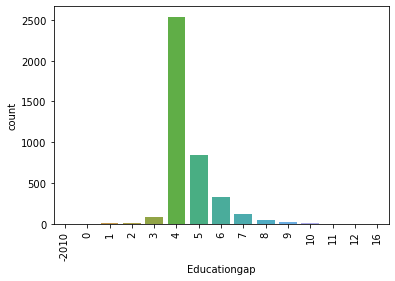

In [218]:
sns.countplot(x='Educationgap', data=df)
plt.xticks(rotation=90)
plt.show()

-- This plot shows any education gap between 12th and graduation or during the graduation,
1. "4" denotes 0 year education gap for UG Students
2. "5" denotes 1 year of Education Gap for UG students
3. "6" denotes no Education Gap for PG students and 2 years of Education Gap for UG students
4. "7" denotes 1 year of Education Gap for PG students 3 years of Education Gap for UG students
5. "8" denotes 2 year of Education Gap for PG students 4 years of Education Gap for UG students.
6. "9" denotes 3 year of Education Gap for PG



#### Checking amcat Eligibility Criteria

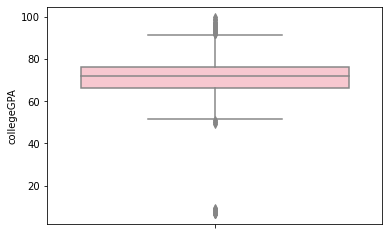

In [13]:
sns.boxplot(y="collegeGPA",data=df,color='pink')
plt.show()

-- This plot shows any students can write the exam who as "55" and above percentage


#### Good aptitude score to maintain

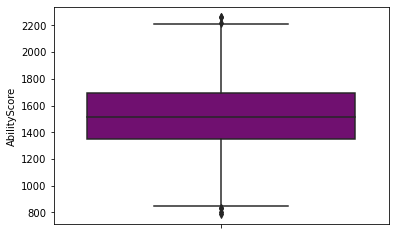

In [207]:
sns.boxplot(y="AbilityScore",data=df,color='purple')
plt.show()

-- This plot shows what is the good score of amcat exam



#### Basic Average Package for amcat qualified

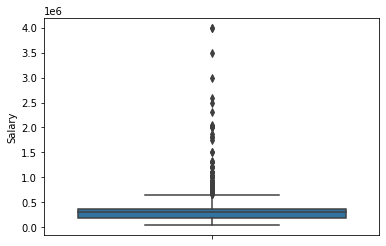

In [15]:
sns.boxplot(y=df["Salary"])
plt.show()

-- This plot describes what is the basic CTC those who write amcat exam


In [16]:
df["Salary"].median()

300000.0

#### Checking is score impacts package??

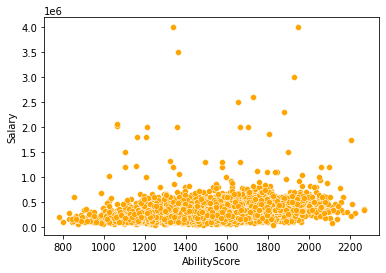

In [17]:
sns.scatterplot(x="AbilityScore",y="Salary",data=df,color='orange')
plt.show()

-- This plot shows there is no change in basic CTC if score is below or above the 1500 but most of students score in the range of 1200-1800.

####  Validity period of amcat score

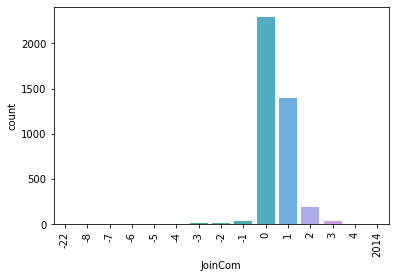

In [18]:
sns.countplot(x='JoinCom', data=df)
plt.xticks(rotation=90)
plt.show()

-- This plot describes what is the validity of the score and period of time taken toapply jobs

1. "0" denotes the qualified students applied for the job within the year and recruitedin company
2. "1" denotes qualified students applied for the jobs after 1 year.
3. "2" denotes qualified students applied for the jobs after 2 years of score.




#### Checking which Gender getting more Salary

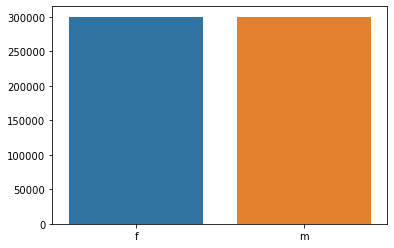

In [200]:
DGender=list(df.groupby(["Gender"])["Salary"].median())
sns.barplot(x=df["Gender"].unique(),y=DGender)
plt.show()

In [219]:
df.groupby(["Gender"])["Salary"].median()

Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64

#### Checking employee Experience

In [22]:
LY=df[df["DOL"]!="present"]
LY['LeavingYear'] = pd.DatetimeIndex(LY['DOL']).year
LY["Experience"]=LY["LeavingYear"]-LY['JoiningYear']

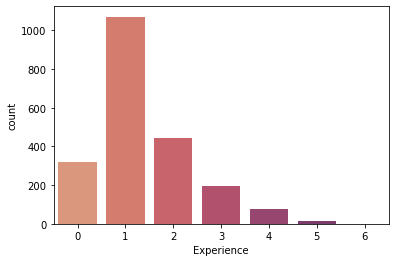

In [23]:
sns.countplot(x='Experience', data=LY, palette='flare')
plt.show()

-- This plot describes the employees left the companies with certain Experience
1. "0" denotes  around 300 employees left the companies with less than 1 year of Experience
2. "1" denotes more than 10000 employeesleft the companies with 1 year of Experience
3. "5" denotes around 10 employees worked for 5 years in a company



#### Checking percentage of board students are writing amcat exam

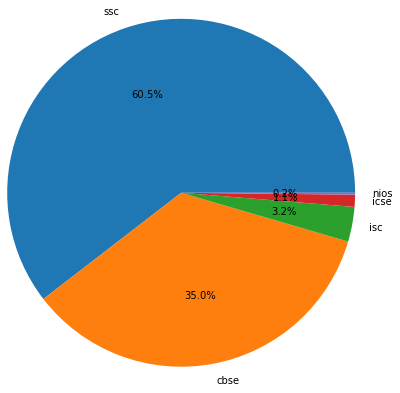

In [224]:
plt.pie(df.value_counts(df["12board"]),labels=df["12board"].unique(),autopct="%.1f%%",radius=2)
plt.show()

##### Conclusion : SSC students are more no.of students attempting the amcat exam 

## Splitting dataset based on Grade 1&2 colleges 

### CollegeTier : 1

In [25]:
Tier1=df.loc[df["CollegeTier"]==1]

In [26]:
Tier1.shape.

(297, 43)

In [27]:
dict={}
for i in Tier1['CollegeTier']:
    if i==1:
        dict[i]=list(Tier1['CollegeTier']).count(i)
print(dict)

{1: 297}


In [28]:
Tier1.value_counts(Tier1["Degree"])

Degree
B.Tech/B.E.      269
M.Tech./M.E.      15
MCA               12
M.Sc. (Tech.)      1
dtype: int64

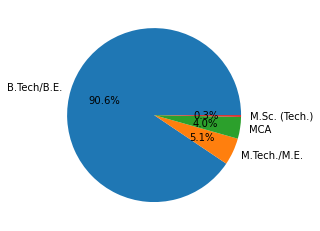

In [29]:
plt.pie(Tier1.value_counts(Tier1["Degree"]),labels=Tier1["Degree"].unique(),autopct="%.1f%%",radius=1)
plt.show()

-- The above pie chart shows percentage of UnderGraduates is more from tier 1 colleges are attempting the amcat exam

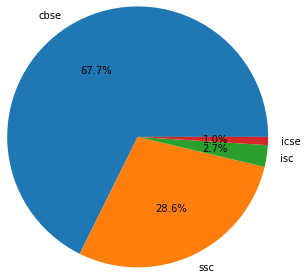

In [283]:
plt.pie(Tier1.value_counts(Tier1["12board"]),labels=Tier1["12board"].unique(),autopct="%.1f%%",radius=1.5)
plt.show()

-- This pie chart shows that in the Tier1 colleges most people are from CBSE background

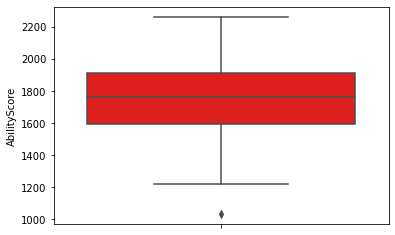

In [31]:
sns.boxplot(y="AbilityScore",data=Tier1,color='red')
plt.show()

-- The Ability score of Tier1 college students is 1750

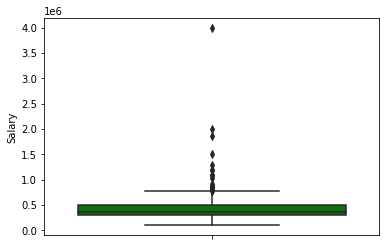

In [226]:
sns.boxplot(y=Tier1["Salary"],color="green")
plt.show()

-- The average CTC of Tier1 college students is 3.6 LPA

In [227]:
Tier1.groupby(["Gender"])["Salary"].median()

Gender
f    350000.0
m    362500.0
Name: Salary, dtype: float64

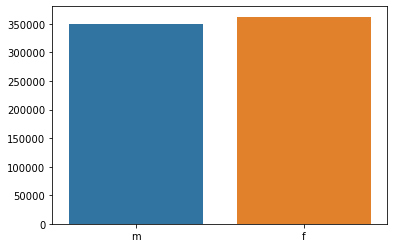

In [202]:
TGender=list(Tier1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=Tier1["Gender"].unique(),y=TGender)
plt.show()

-- The male aerage salary is more compare to Female fromthe Tier 1 colleges

## Tier1 B-Tech/B.E students

In [35]:
B_techT1=Tier1[Tier1["Degree"]=='B.Tech/B.E.']

In [228]:
B_techT1["Salary"].median()

350000.0

In [301]:
B_techT1["AbilityScore"].mean()

1758.007434944238

In [302]:
B_techT1.groupby(["Gender"])["Salary"].median()

Gender
f    340000.0
m    350000.0
Name: Salary, dtype: float64

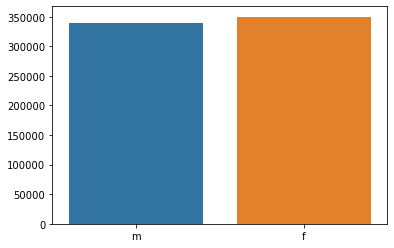

In [229]:
BGender=list(B_techT1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=B_techT1["Gender"].unique(),y=BGender)
plt.show()

##### Conclusion : 
1. The Basic CTC for B-tech Tier 1 College students is 3.5 LPA
2. The average ability marks scored by B_tech students is 1759
3. The female average salary is more comapare to the male salary from Tier1 B-tech/B.E students

### B-Tech/B.E Tier1 amcat optional subjects

### Tier1  Computer Science

In [233]:
CseT1=B_techT1[B_techT1["ComputerScience"]!="NaN"]

In [234]:
CseT1.shape

(55, 43)

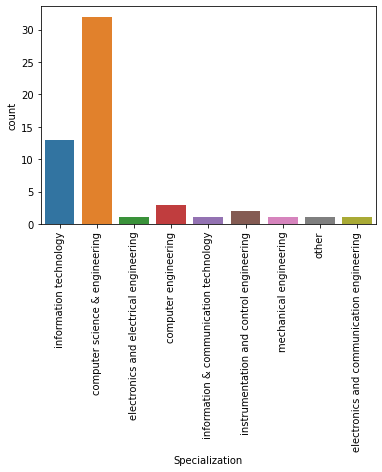

In [238]:
sns.countplot(x='Specialization', data=CseT1)
plt.xticks(rotation=90)
plt.show()

In [236]:
CseT1["Salary"].mean()

387272.7272727273

In [232]:
CseT1["AbilityScore"].mean()

1742.1636363636364

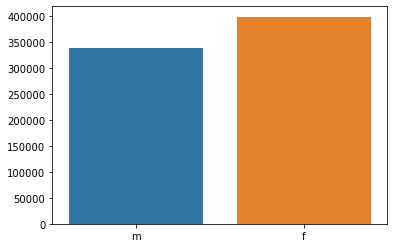

In [45]:
CGender=list(CseT1.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=CseT1["Gender"].unique(),y=CGender)
plt.show()

##### Conclusion : 
1. Core Branches like CSE and IT where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 3.8 LPA who attempted Computer science
2. The average ability marks scored by B_tech students is 1743
3. The female average salary is more comapare to the male salary from Tier1 B-tech/B.E students

### Tier1 Mechanical Engg.

In [46]:
MeT1=B_techT1[B_techT1["MechanicalEngg"]!="NaN"]

In [47]:
MeT1.shape

(20, 43)

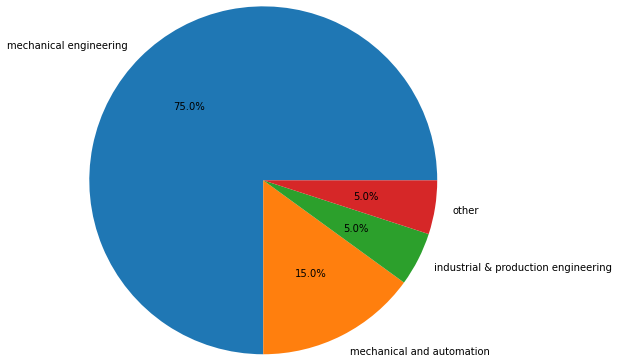

In [48]:
plt.pie(MeT1.value_counts(MeT1["Specialization"]),labels=MeT1["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [239]:
MeT1["Salary"].median()

525000.0

In [240]:
MeT1["AbilityScore"].mean()

1835.25

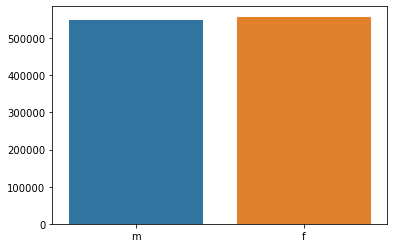

In [52]:
MGender=list(MeT1.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=MeT1["Gender"].unique(),y=MGender)
plt.show()

##### Conclusion : 
1. Core Branches like Mechanucal streams where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 5.25 LPA who attempted Mechanical Enginnering
2. The average ability marks scored by B_tech students is 1835
3. The female average salary is more comapare to the male salary from Tier1 B-tech/B.E students

### Tier1 Computer Programming

In [53]:
CPT1=B_techT1[B_techT1["ComputerProgramming"]!="NaN"]

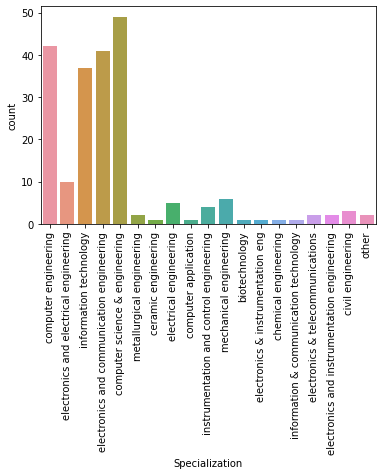

In [54]:
sns.countplot(x='Specialization', data=CPT1)
plt.xticks(rotation=90)
plt.show()

In [55]:
CPT1["Salary"].median()

350000.0

In [56]:
CPT1["AbilityScore"].mean()

1757.6587677725117

In [243]:
CPT1.groupby(["Gender"])["Salary"].median()

Gender
f    350000.0
m    350000.0
Name: Salary, dtype: float64

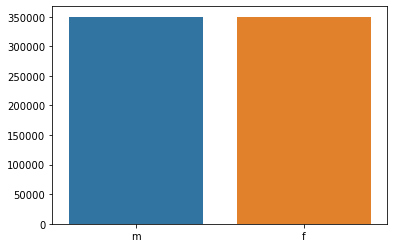

In [242]:
CGender=list(CPT1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=CPT1["Gender"].unique(),y=CGender)
plt.show()

##### Conclusion : 
1. Core Branches like Computer science where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 3.5 LPA who attempted Computer programming
2. The average ability marks scored by B_tech students is 1757
3. The female average salary is equal  to the male salary from Tier1 B-tech/B.E students

### Tier1 ElectronicsAndSemiconductor

In [58]:
EST1=B_techT1[B_techT1["ElectronicsAndSemicon"]!="NaN"]

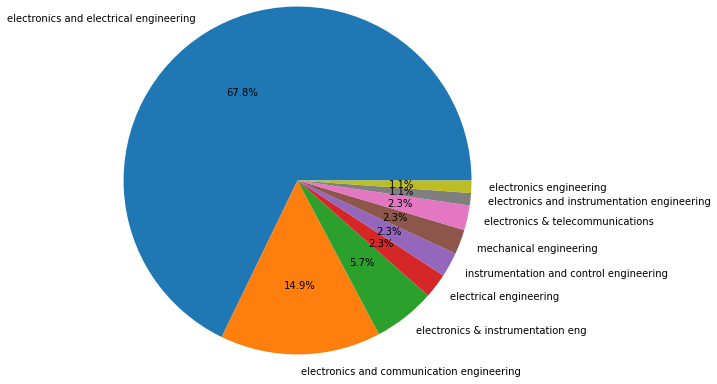

In [59]:
plt.pie(EST1.value_counts(EST1["Specialization"]),labels=EST1["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [60]:
EST1["Salary"].median()

340000.0

In [61]:
EST1["AbilityScore"].mean()

1788.7356321839081

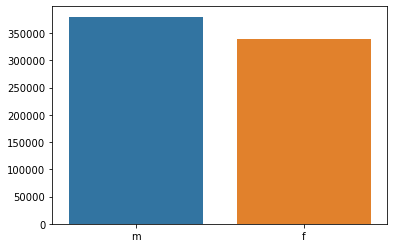

In [245]:
EsGender=list(EST1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=EST1["Gender"].unique(),y=EsGender)
plt.show()

##### Conclusion : 
1. Core Branches like EEE science where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 3.4 LPA who attempted Electronins and SemiConductors
2. The average ability marks scored by B_tech students is 1788
3. The male average salary is more compare  to the female salary from Tier1 B-tech/B.E students

### Tier1 ElectricalEngg

In [63]:
EET1=B_techT1[B_techT1["ElectricalEngg"]!="NaN"]

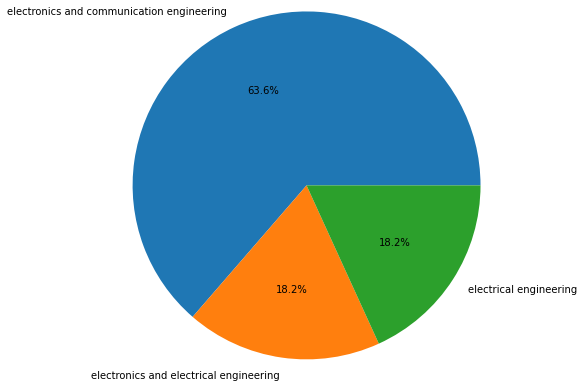

In [64]:
plt.pie(EET1.value_counts(EET1["Specialization"]),labels=EET1["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [65]:
EET1["Salary"].median()

325000.0

In [66]:
EET1["AbilityScore"].mean()

1697.2727272727273

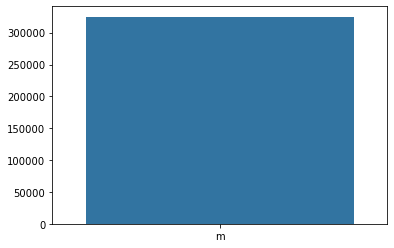

In [247]:
EsGender=list(EET1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=EET1["Gender"].unique(),y=EsGender)
plt.show()

##### Conclusion : 
1. Core Branches like ECE where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 3.25 LPA who attempted Computer programming
2. The average ability marks scored by B_tech students is 1697
3. There are male who are earning salary from Tier1 B-tech/B.E students

### Tier1 Telecommunication Engineering


In [67]:
TET1=B_techT1[B_techT1["TelecomEngg"]!="NaN"]

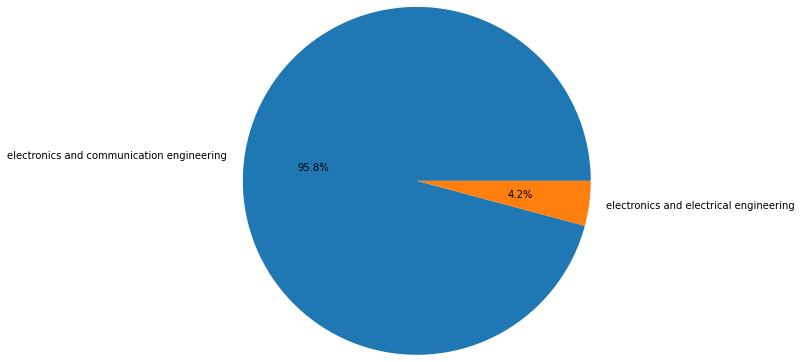

In [68]:
plt.pie(TET1.value_counts(TET1["Specialization"]),labels=TET1["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [69]:
TET1["Salary"].median()

330000.0

In [70]:
TET1["AbilityScore"].mean()

1768.2916666666667

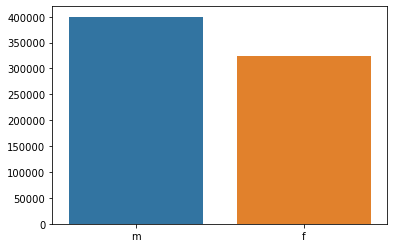

In [248]:
EsGender=list(TET1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=TET1["Gender"].unique(),y=EsGender)
plt.show()

##### Conclusion : 
1. Core Branches like ECE where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 3.3 LPA who attempted Telecom Engineering
2. The average ability marks scored by B_tech students is 1769
3. The male average salary is equal  to the female salary from Tier1 B-tech/B.E students

### Tier1 CivilEngg

In [250]:
CET1=B_techT1[B_techT1["CivilEngg"]!="NaN"]

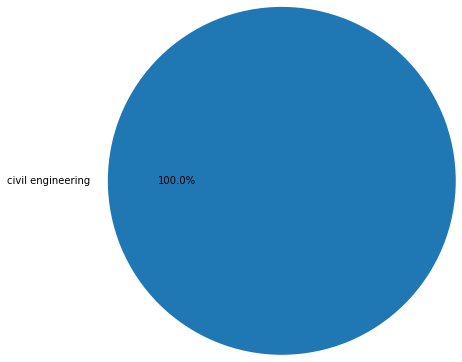

In [252]:
plt.pie(CET1.value_counts(CET1["Specialization"]),labels=CET1["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [255]:
CET1["Salary"].median()

507500.0

In [256]:
CET1["AbilityScore"].mean()

1736.5

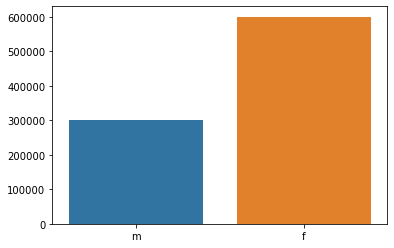

In [257]:
EsGender=list(CET1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=CET1["Gender"].unique(),y=EsGender)
plt.show()

##### Conclusion : 
1. Core Branches like Civil Engineering where sticked to thier core optional subject
1. The Basic CTC for B-tech Tier 1 College students is 5 LPA who attempted CivilEngg.
2. The average ability marks scored by B_tech students is 1736
3. The female average salary is more comapare  to the male salary from Tier1 B-tech/B.E students

### Tier1 M.Tech/M.E. Students

In [76]:
MtechT1=Tier1[Tier1["Degree"]=='M.Tech./M.E.']

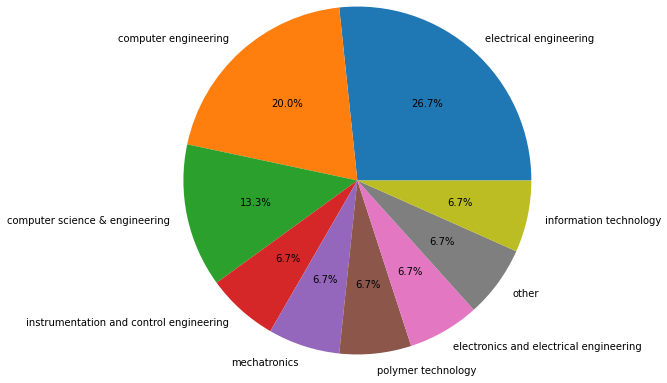

In [77]:
plt.pie(MtechT1.value_counts(MtechT1["Specialization"]),labels=MtechT1["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [78]:
MtechT1["Salary"].median()

440000.0

In [79]:
MtechT1["AbilityScore"].mean()

1723.8666666666666

In [262]:
MtechT1.groupby(["Gender"])["Salary"].median()

Gender
f    445000.0
m    440000.0
Name: Salary, dtype: float64

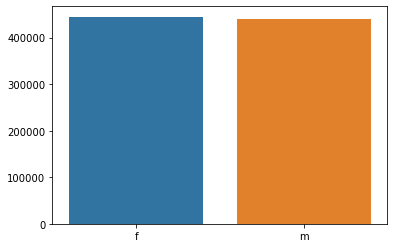

In [261]:
EsGender=list(MtechT1.groupby(["Gender"])["Salary"].median())
sns.barplot(x=MtechT1["Gender"].unique(),y=EsGender)
plt.show()

##### Conclusion : 
1. No M-Tech students where choose thier core subject they continued with optionalsubject
1. The Basic CTC for B-tech Tier 1 College students is 4.4 LPA who attempted aptitude Test
2. The average ability marks scored by B_tech students is 1724
3. The female average salary is more compare  to the male salary from Tier1 M-tech/M.E students

### Tier1 MCA students

In [80]:
MCA=Tier1[Tier1["Degree"]=='MCA']

In [82]:
MCA["Salary"].median()

315000.0

In [83]:
MCA["AbilityScore"].mean()

1584.1666666666667

In [303]:
MCA.groupby(["Gender"])["Salary"].median()

Gender
f    215000.0
m    207500.0
Name: Salary, dtype: float64

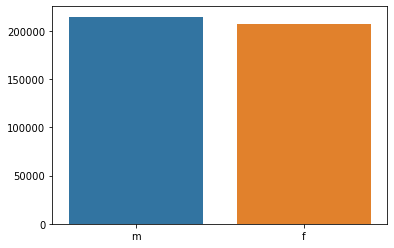

In [263]:
EsGender=list(MCA.groupby(["Gender"])["Salary"].median())
sns.barplot(x=MCA["Gender"].unique(),y=EsGender)
plt.show()

#### Conclusion : 
1. The Basic CTC for B-tech Tier 1 College students is 3.15 LPA who attempted amcat aptitude
2. The average ability marks scored by B_tech students is 1584
3. The male average salary is more compare  to the female salary from Tier1 B-tech/B.E students

### Tier1 M.sc.students

In [84]:
Tier1[Tier1["Degree"]=='M.Sc. (Tech.)']

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,AbilityScore,Educationgap,JoiningYear,JoinCom
2130,train,552431,460000.0,5/1/2013 0:00,present,software engineer,Gandhinagar,m,2/12/1991 0:00,73.0,...,NaN,-0.3027,-2.6181,-1.9881,-1.1218,-1.4356,1715,5,2013,0


## CollegeTier : 2

In [85]:
Tier2=df.loc[df["CollegeTier"]==2]

In [86]:
Tier2.shape

(3701, 43)

In [87]:
dict={}
for i in Tier2['CollegeTier']:
    if i==2:
        dict[i]=list(Tier2['CollegeTier']).count(i)
print(dict)

{2: 3701}


In [88]:
Tier2.value_counts(Tier2["Degree"])

Degree
B.Tech/B.E.      3431
MCA               231
M.Tech./M.E.       38
M.Sc. (Tech.)       1
dtype: int64

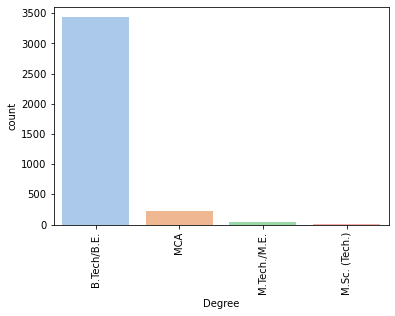

In [89]:
sns.countplot(x='Degree', data=Tier2,palette='pastel')
plt.xticks(rotation=90)
plt.show()

-- The above plot shows B-Tech/B.E students are attempting the amcat exam from Tier2 colleges

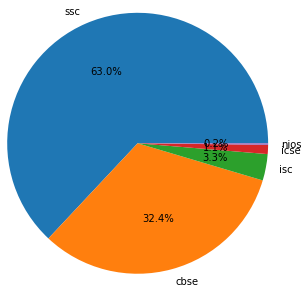

In [159]:
plt.pie(Tier2.value_counts(Tier2["12board"]),labels=Tier2["12board"].unique(),autopct="%.1f%%",radius=1.5)
plt.show()

-- The pie chart shows, from Tier2 colleges SSC board students are high

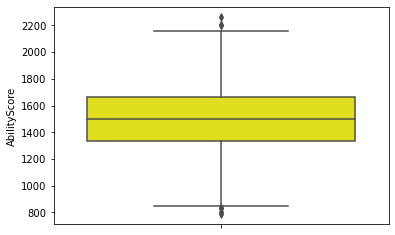

In [90]:
sns.boxplot(y="AbilityScore",data=Tier2,color='yellow')
plt.show()

-- The average Ability from Tier2 colleges is 1500

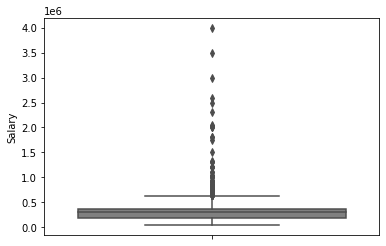

In [91]:
sns.boxplot(y=Tier2["Salary"],color="gray")
plt.show()

-- The Basic CTC for Tier 2 colleges is 3.LPA

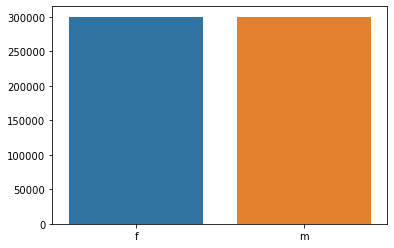

In [267]:
TGender=list(Tier2.groupby(["Gender"])["Salary"].median())
sns.barplot(x=Tier2["Gender"].unique(),y=TGender)
plt.show()

In [268]:
Tier2.groupby(["Gender"])["Salary"].median()

Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64

-- The average salary for male and female is 3.LPA

### Tier2 B-Tech/B.E  amcat

In [93]:
B_techT2=Tier2[Tier2["Degree"]=='B.Tech/B.E.']

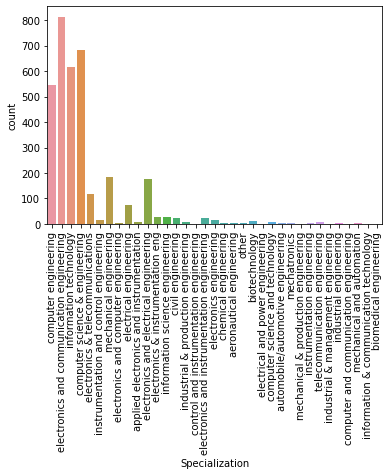

In [94]:
sns.countplot(x='Specialization', data=B_techT2)
plt.xticks(rotation=90)
plt.show()

In [309]:
B_techT2["Salary"].median()

300000.0

In [96]:
B_techT2["AbilityScore"].mean()

1506.8802098513554

In [310]:
B_techT2.groupby(["Gender"])["Salary"].mean()

Gender
f    289822.064057
m    301570.324575
Name: Salary, dtype: float64

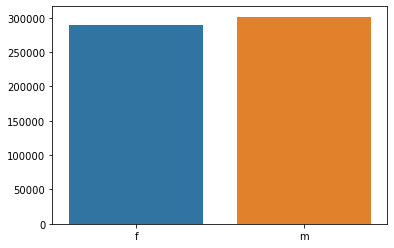

In [97]:
BGender=list(B_techT2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=B_techT2["Gender"].unique(),y=BGender)
plt.show()

### B-Tech Tier2 amcat optional subjects

### Tier2 CSE

In [98]:
CseT2=B_techT2[B_techT2["ComputerScience"]!="NaN"]

In [99]:
CseT2.shape

(769, 43)

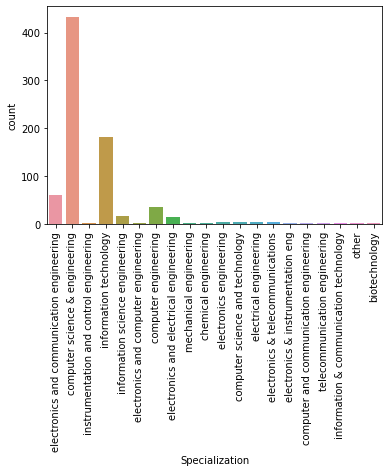

In [100]:
sns.countplot(x='Specialization', data=CseT2)
plt.xticks(rotation=90)
plt.show()

In [101]:
CseT2["Salary"].mean()

258335.50065019506

<AxesSubplot:xlabel='Salary'>

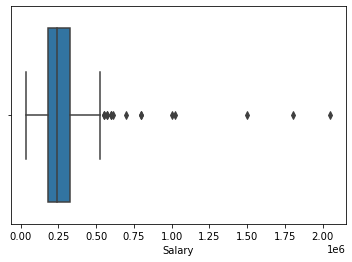

In [102]:
sns.boxplot(CseT2["Salary"])

In [103]:
CseT2["AbilityScore"].mean()

1496.9583875162548

### Tier2 Mechanical Engineering

In [104]:
MeT2=B_techT2[B_techT2["MechanicalEngg"]!="NaN"]

In [105]:
MeT2.shape

(213, 43)

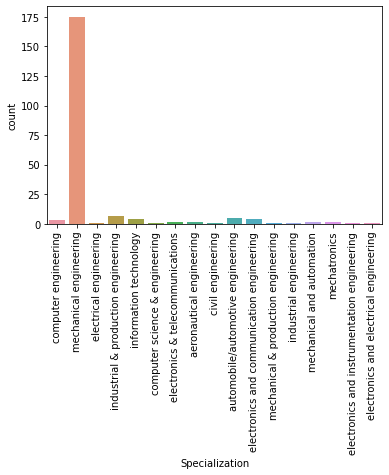

In [106]:
sns.countplot(x='Specialization', data=MeT2)
plt.xticks(rotation=90)
plt.show()

In [273]:
MeT2["Salary"].median()

250000.0

In [274]:
MeT2["AbilityScore"].mean()

1474.4835680751173

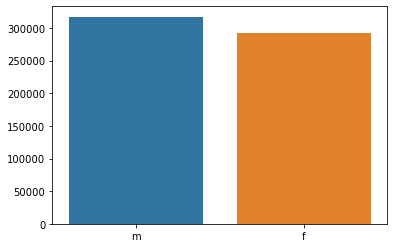

In [275]:
BGender=list(MeT2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=MeT2["Gender"].unique(),y=BGender)
plt.show()

### Tier2 Civil Engineering

In [110]:
CET2=B_techT2[B_techT2["CivilEngg"]!="NaN"]

In [111]:
CET2.shape

(35, 43)

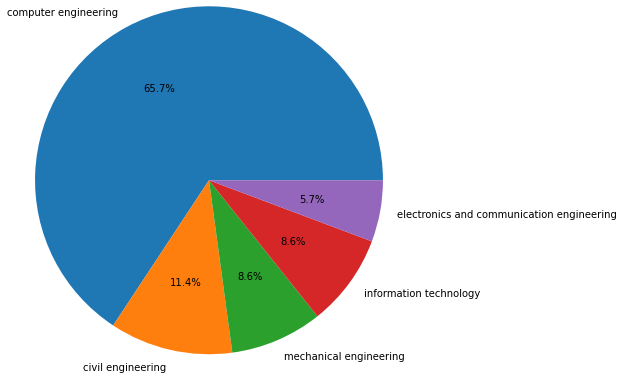

In [112]:
plt.pie(CET2.value_counts(CET2["Specialization"]),labels=CET2["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [272]:
CET2["Salary"].median()

320000.0

In [114]:
CET2["AbilityScore"].mean()

1448.4

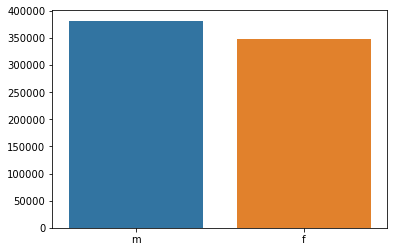

In [115]:
BGender=list(CET2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=CET2["Gender"].unique(),y=BGender)
plt.show()

### Tier2 Telecommunication Engineering

In [116]:
TET2=B_techT2[B_techT2["TelecomEngg"]!="NaN"]

In [117]:
TET2.shape

(347, 43)

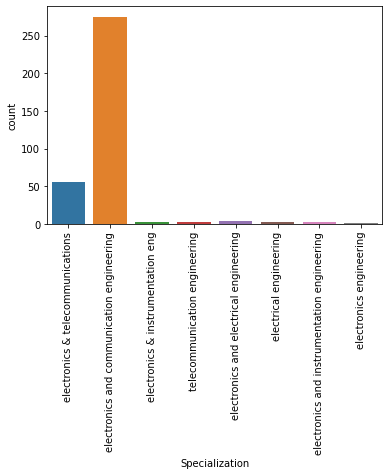

In [118]:
sns.countplot(x='Specialization', data=TET2)
plt.xticks(rotation=90)
plt.show()

In [271]:
TET2["Salary"].median()

265000.0

In [270]:
TET2["AbilityScore"].mean()

1490.7838616714698

In [121]:
TET2.groupby(["Gender"])["Salary"].mean()

Gender
f    286055.555556
m    284455.252918
Name: Salary, dtype: float64

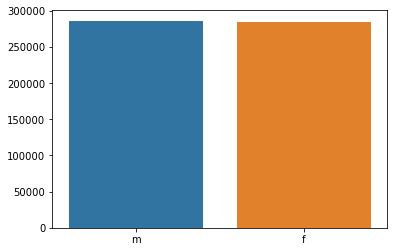

In [122]:
BGender=list(TET2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=TET2["Gender"].unique(),y=BGender)
plt.show()

### Electrical Engineering

In [123]:
EET2=B_techT2[B_techT2["ElectricalEngg"]!="NaN"]

In [124]:
EET2.shape

(149, 43)

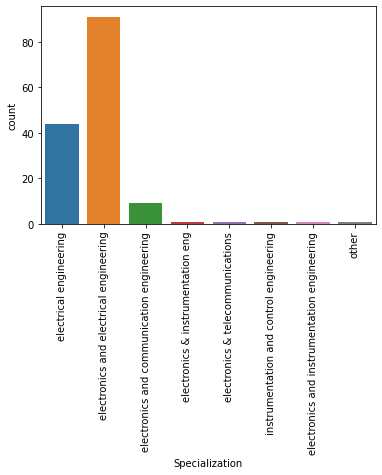

In [277]:
sns.countplot(x='Specialization', data=EET2)
plt.xticks(rotation=90)
plt.show()

In [278]:
TET2["Salary"].median()

265000.0

<AxesSubplot:xlabel='Salary'>

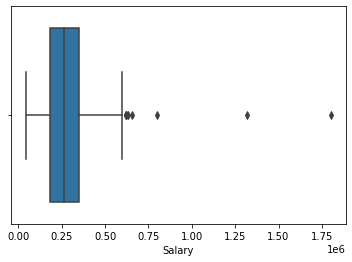

In [279]:
sns.boxplot(TET2["Salary"])

In [280]:
EET2["AbilityScore"].mean()

1519.8590604026845

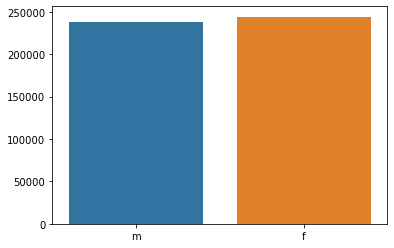

In [281]:
BGender=list(EET2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=EET2["Gender"].unique(),y=BGender)
plt.show()

### Tier2  Computer Programming

In [282]:
CPT2=B_techT2[B_techT2["ComputerProgramming"]!="NaN"]

In [131]:
CPT2.shape

(2644, 43)

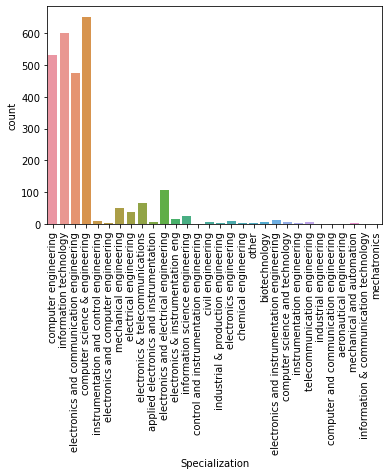

In [132]:
sns.countplot(x='Specialization', data=CPT2)
plt.xticks(rotation=90)
plt.show()

In [133]:
CPT2["Salary"].median()

300000.0

<AxesSubplot:xlabel='Salary'>

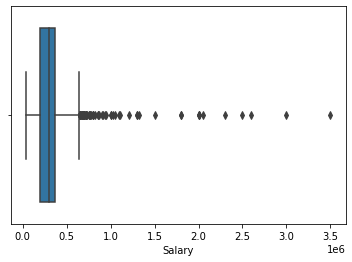

In [134]:
sns.boxplot(CPT2["Salary"])

In [135]:
CPT2["AbilityScore"].mean()

1509.7753403933434

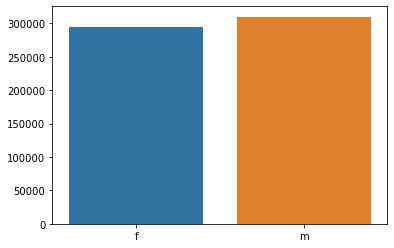

In [136]:
BGender=list(CPT2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=CPT2["Gender"].unique(),y=BGender)
plt.show()

### Tier2 Electronics And Semiconductors

In [137]:
EST2=B_techT2[B_techT2["ElectronicsAndSemicon"]!="NaN"]

In [138]:
EST2.shape

(1039, 43)

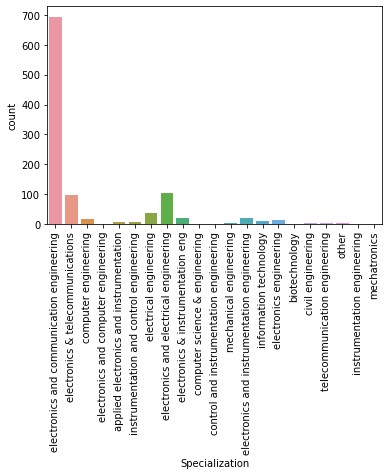

In [139]:
sns.countplot(x='Specialization', data=EST2)
plt.xticks(rotation=90)
plt.show()

In [140]:
EST2["Salary"].mean()

294181.90567853703

<AxesSubplot:xlabel='Salary'>

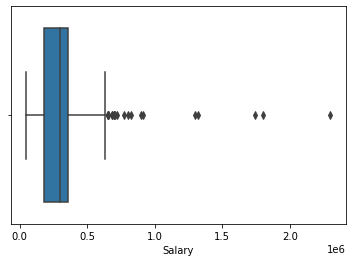

In [141]:
sns.boxplot(EST2["Salary"])

In [142]:
EST2["AbilityScore"].mean()

1502.8354186717997

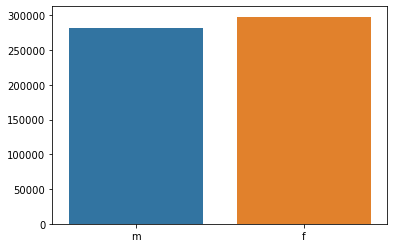

In [143]:
BGender=list(EST2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=EST2["Gender"].unique(),y=BGender)
plt.show()

## Tier2 M-Tech/M.E

In [157]:
MtechT2=Tier2[Tier2["Degree"]=='M.Tech./M.E.']


In [145]:
MtechT2.shape

(38, 43)

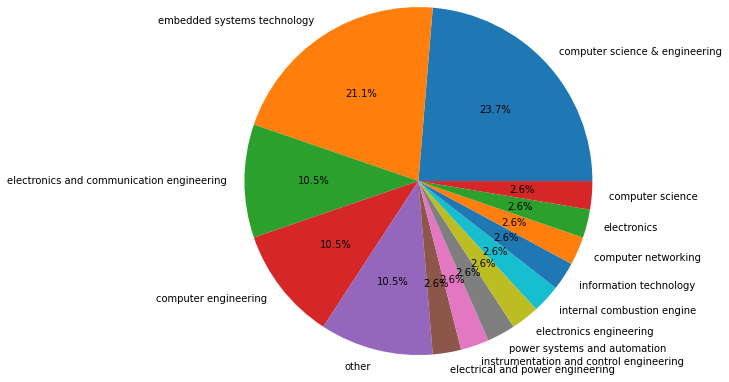

In [146]:
plt.pie(MtechT2.value_counts(MtechT2["Specialization"]),labels=MtechT2["Specialization"].unique(),autopct="%.1f%%",radius=2)
plt.show()

In [308]:
MtechT2["Salary"].mean()

263947.36842105264

In [148]:
MtechT2["AbilityScore"].mean()

1476.342105263158

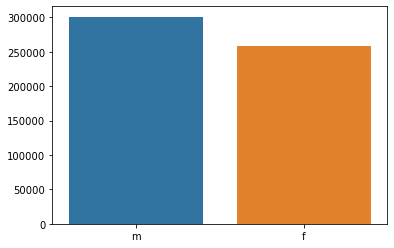

In [149]:
BGender=list(MtechT2.groupby(["Gender"])["Salary"].mean())
sns.barplot(x=MtechT2["Gender"].unique(),y=BGender)
plt.show()

In [307]:
MtechT2.groupby(["Gender"])["Salary"].mean()

Gender
f    301000.000000
m    258333.333333
Name: Salary, dtype: float64

## Tier 2 MCA

In [150]:
MCA=Tier2[Tier2["Degree"]=='MCA']

In [151]:
MCA.shape

(231, 43)

In [305]:
MCA["Salary"].mean()

276233.7662337662

<AxesSubplot:xlabel='Salary'>

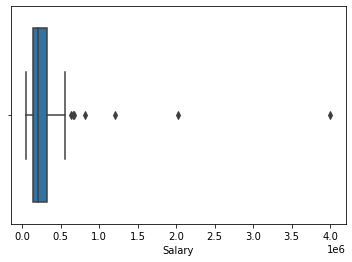

In [153]:
sns.boxplot(MCA["Salary"])

In [306]:
MCA.groupby(["Gender"])["Salary"].mean()


Gender
f    265263.157895
m    279827.586207
Name: Salary, dtype: float64

In [154]:
MCA["AbilityScore"].mean()

1370.5281385281385

## Tier2 M.sc

In [155]:
Tier2[Tier2["Degree"]=='M.Sc. (Tech.)']

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,AbilityScore,Educationgap,JoiningYear,JoinCom
3505,train,455860,180000.0,4/1/2013 0:00,7/1/2013 0:00,programmer,Phagwara,f,12/27/1989 0:00,73.0,...,NaN,-0.0696,0.5008,0.8171,0.4442,0.0284,1185,7,2013,-2


# Insights(Score,CTC,Gender avg.Salary)

## Degree Tier1 and Tier 2 colleges 

In [298]:
df1=pd.DataFrame({"Abilityscore":[1750,1500],"College":["Tier1","Tier2"],"CTC":[3.5,3.0]})
df2=pd.DataFrame({"Gender":["Female","Male","Female","Male"],"AvgSalary":[3.5,3.0,3.0,3.0]})

,Gender,AvgSalary
0,Female,3.5
1,Male,3.0
2,Female,3.0
3,Male,3.0


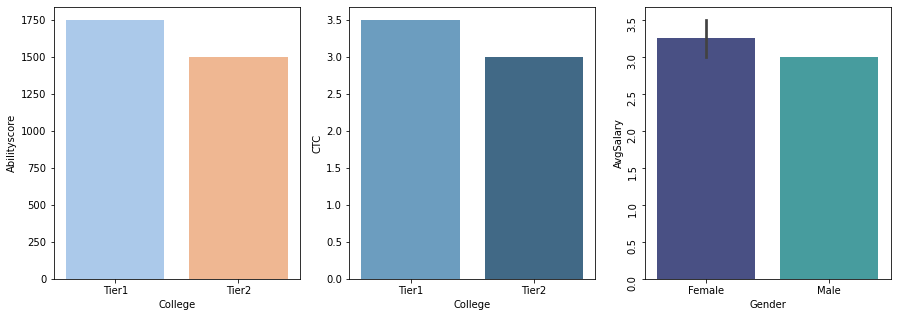

In [321]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='College',y='Abilityscore',data=df1,ax=ax1,palette="pastel")
plt.yticks(rotation=90)
sns.barplot(x='College',y='CTC',data=df1,ax=ax2,palette="Blues_d")
plt.yticks(rotation=90)
sns.barplot(x='Gender',y='AvgSalary',data=df2,ax=ax3,palette="mako")
plt.yticks(rotation=90)
plt.show()

## B-Tech/B.E. Tier1 and Tier2 colleges

In [327]:
df3=pd.DataFrame({"Abilityscore":[1759,1506],"College":["Tier1","Tier2"],"CTC":[4.4,2.7]})
df4=pd.DataFrame({"Gender":["Female","Male","Female","Male"],"AvgSalary":[3.4,3.5,2.9,3.0]})

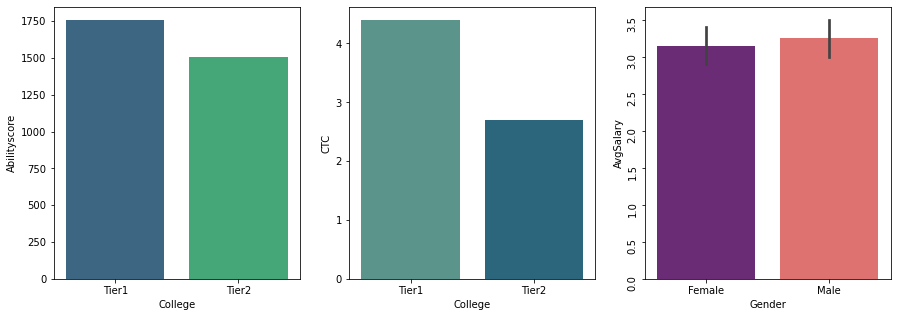

In [329]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='College',y='Abilityscore',data=df3,ax=ax1,palette="viridis")
plt.yticks(rotation=90)
sns.barplot(x='College',y='CTC',data=df3,ax=ax2,palette="crest")
plt.yticks(rotation=90)
sns.barplot(x='Gender',y='AvgSalary',data=df4,ax=ax3,palette="magma")
plt.yticks(rotation=90)
plt.show()

##  M-Tech/M.E. Tier1 and Tier2 colleges

In [334]:
df4=pd.DataFrame({"Abilityscore":[1724,1476],"College":["Tier1","Tier2"],"CTC":[4.4,2.7]})
df5=pd.DataFrame({"Gender":["Female","Male","Female","Male"],"AvgSalary":[4.5,4.4,3.0,2.5]})

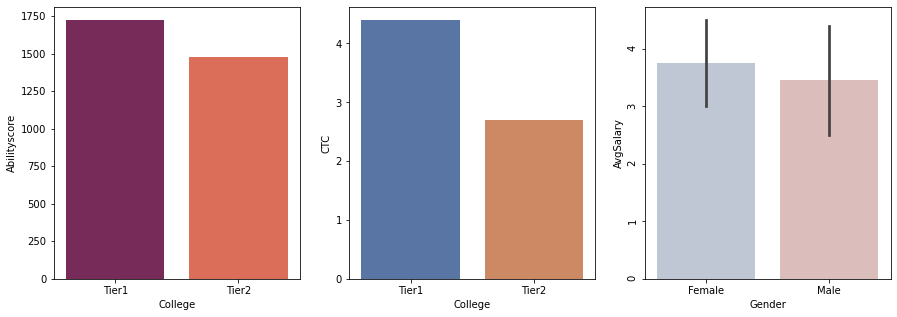

In [335]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='College',y='Abilityscore',data=df4,ax=ax1,palette="rocket")
plt.yticks(rotation=90)
sns.barplot(x='College',y='CTC',data=df4,ax=ax2,palette="deep")
plt.yticks(rotation=90)
sns.barplot(x='Gender',y='AvgSalary',data=df5,ax=ax3,palette="vlag")
plt.yticks(rotation=90)
plt.show()

##  MCA Tier1 and Tier2 colleges

In [324]:
df4=pd.DataFrame({"Abilityscore":[1585,1370],"College":["Tier1","Tier2"],"CTC":[3.5,2.7]})
df5=pd.DataFrame({"Gender":["Female","Male","Female","Male"],"AvgSalary":[2.15,2.0,2.8,2.65]})

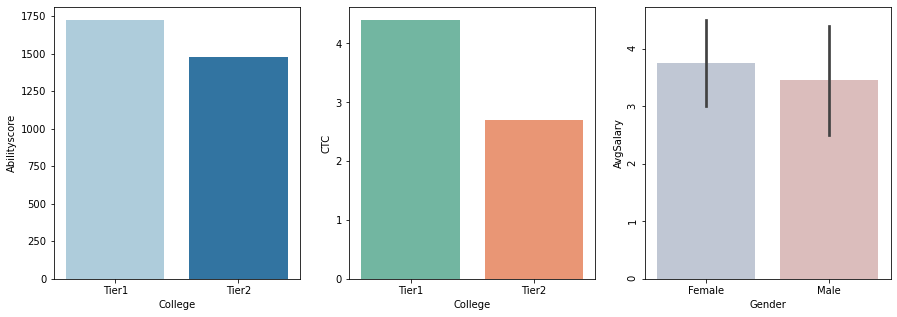

In [333]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='College',y='Abilityscore',data=df4,ax=ax1,palette="Paired")
plt.yticks(rotation=90)
sns.barplot(x='College',y='CTC',data=df4,ax=ax2,palette="Set2")
plt.yticks(rotation=90)
sns.barplot(x='Gender',y='AvgSalary',data=df5,ax=ax3,palette="vlag")
plt.yticks(rotation=90)
plt.show()

## Conclusions:

##### 1.students can write the exam who has education gap betwen 0 to 4 years and also companies recruites them
##### 2.Minimum Eligible Criteria to write amcat is 55%
##### 3.1500 is average score to maintain for amcat exam
##### 4.Basic CTC for any amcat students is 3.LPA
##### 5.Validity of score is 1 year and to extend your validity students have to subscribe for validity score subscription
##### 6.amcat score is not impacting on CTC 
##### 7.Male and Female both average salary is equal 3.LPA "No Gender Bias
##### 8.Average period of  employee working in a comapny is 1-2 years gained Experience also same as working period

NameError: name 'XDG_RUNTIME_DIR' is not defined